https://ai.hblab.vn/2017/10/intersection-over-union-iou-cho-object.html

https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf


In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [ ]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2

(240, 240, 3)


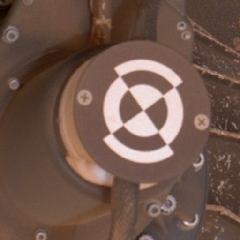

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow # for image display
path = '/content/drive/MyDrive/1. tool collab/00 ảnh fix/marker_cut_rgb_512.png'
img = cv2.imread(path, 1)
img = cv2.resize(img, (240, 240),interpolation = cv2.INTER_NEAREST)
print(img.shape)
cv2_imshow(img)
cv2.destroyAllWindows()


In [ ]:
# define the list of example detections
examples = [
	Detection("/content/drive/MyDrive/1. tool collab/00 ảnh fix/marker_cut_rgb_512.png", [39, 63, 203, 112], [54, 66, 198, 114]),
	Detection("/content/drive/MyDrive/1. tool collab/00 ảnh fix/2.png", [49, 75, 203, 125], [42, 78, 186, 126]),
	Detection("/content/drive/MyDrive/1. tool collab/00 ảnh fix/2.png", [31, 69, 201, 125], [18, 63, 235, 135]),
	Detection("/content/drive/MyDrive/1. tool collab/00 ảnh fix/2.png", [50, 72, 197, 121], [54, 72, 198, 120]),
	Detection("/content/drive/MyDrive/1. tool collab/00 ảnh fix/2.png", [35, 51, 196, 110], [36, 60, 180, 108])]

/content/drive/MyDrive/1. tool collab/00 ảnh fix/2.png: 0.7958


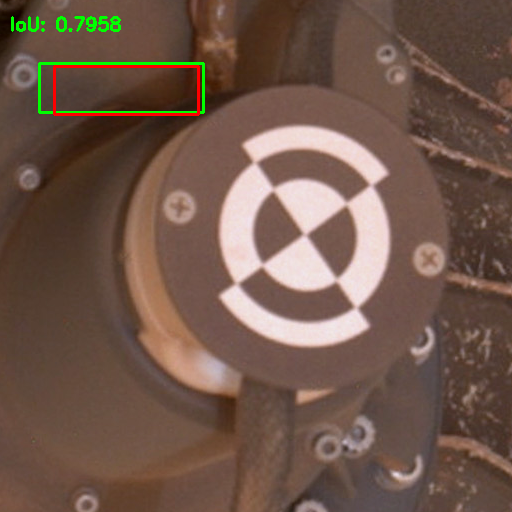

-1

In [ ]:
# loop over the example detections
# for detection in examples:
# load the image

# image = cv2.imread(detection.image_path)
image = cv2.imread(examples[0].image_path)
# cv2_imshow(image)
# draw the ground-truth bounding box along with the predicted
# bounding box
cv2.rectangle(image, tuple(detection.gt[:2]), 
  tuple(detection.gt[2:]), (0, 255, 0), 2)
cv2.rectangle(image, tuple(detection.pred[:2]), 
  tuple(detection.pred[2:]), (0, 0, 255), 2)
# compute the intersection over union and display it
iou = bb_intersection_over_union(detection.gt, detection.pred)
cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
print("{}: {:.4f}".format(detection.image_path, iou))
# show the output image

cv2_imshow(image)

# cv2.imshow("Image", image)
cv2.waitKey(0)